# Text pre-processing

This collects various pre-processing steps for unstructured text in a typical NLP pipeline. All of these made sense in 2018 and likely still do in many cases.

## Resources
 - [Understanding Feature Engineering - 3 - Unstructured text data](./NLP/pdfs/Understanding%20Feature%20Engineering%203%20-%20text%20data%20-%20Dipanjan%20Sarkar.pdf)
 - [Practical Machine Learning with Python - Text normalization](https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/notebooks/Ch07_Analyzing_Movie_Reviews_Sentiment/Text%20Normalization%20Demo.ipynb)


## Loading up text from a corpus

>  Corpus _a collection of text documents usually belonging to a limited set of subjects_

## Import necessary dependencies
 - pandas
 - numpy
 - nltk
 - spacy
 - BeautifulSoup (bs4 package)
 - unicodedata


In [47]:
# Download the models to use if it is the first time using it.
# !python -m spacy download en_core_web_sm

In [53]:
import spacy
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
import contractions
import unicodedata
import matplotlib.pyplot as plt

# Download stop words if not installed already. 
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words('english')
stops_set = set(stops)
stops_set.remove('no')   # ??
stops_set.remove('not')  # ??

tokenizer = ToktokTokenizer()

# old: nlp = spacy.load('en', parse = False, tag=False, entity=False)
# Download model first using
nlp = spacy.load('en_core_web_sm')

pd.options.display.max_colwidth = 200
%matplotlib inline

%load_ext nb_js_diagrammers
import iplantuml

# About Text pre-processing

There are many ways of cleaning up data so it can be better input to traditional methods meant for regression analysis.
 - All of them have specific reasons for existing
   - they remove things that do not add value to the model
   - they remove things that can give you a bad model
 - However, based on the specific problem you are trying to achieve, all of them might warrant a closer look to see if they hurt or help.

The following are copied from Sarkar's jupyter notebook (link above) except I an running them with example data where possible. Dig deeper into these as needed.

Writing output for /home/vamsi/bitbucket/hillops/docs/AI/NLP/91cc6af8-b3cd-4dae-bfea-b2b4074d80c7.uml to 91cc6af8-b3cd-4dae-bfea-b2b4074d80c7.svg


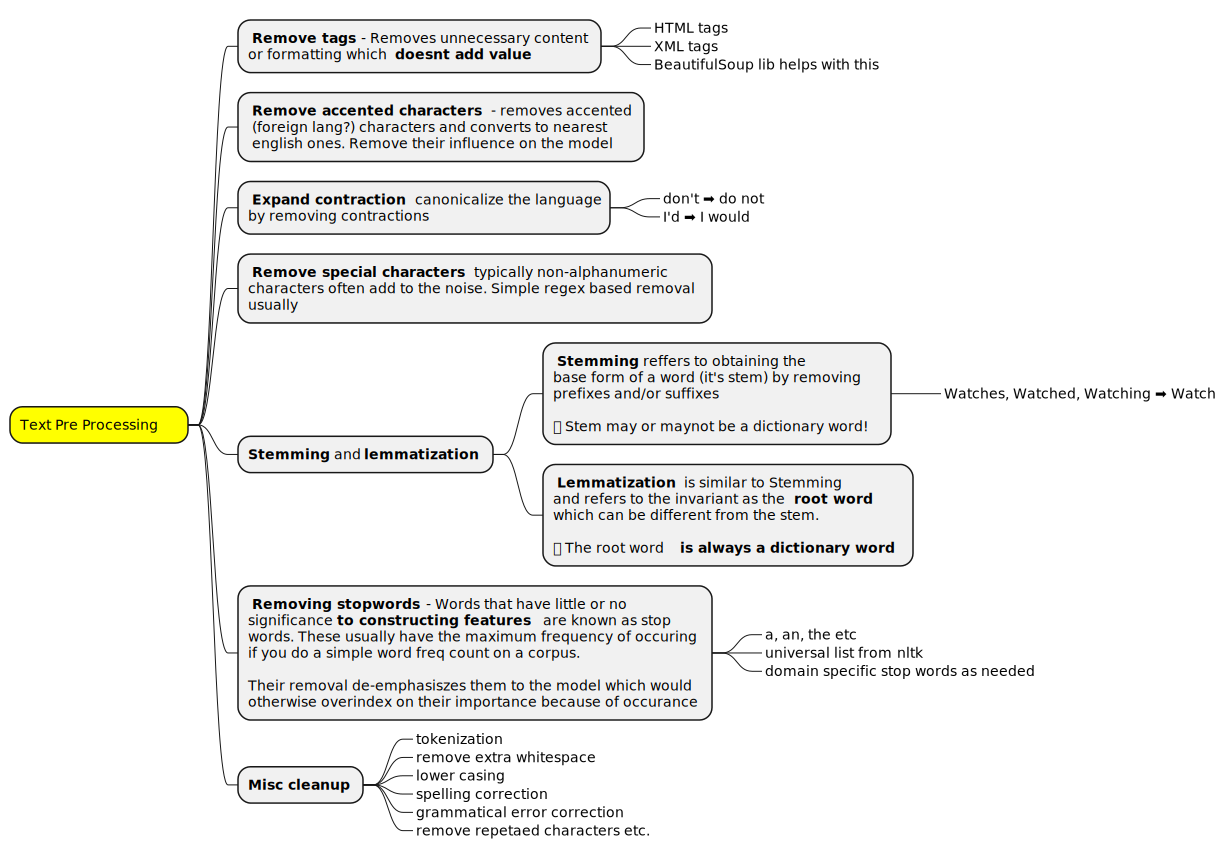

In [15]:
%%plantuml

@startmindmap
*[#yellow] Text Pre Processing    
**: **Remove tags** - Removes unnecessary content 
or formatting which **doesnt add value**;
***_ HTML tags
***_ XML tags
***_ BeautifulSoup lib helps with this

**: **Remove accented characters** - removes accented
 (foreign lang?) characters and converts to nearest
 english ones. Remove their influence on the model;

**: **Expand contraction** canonicalize the language
by removing contractions;
***_ don't ➡️ do not
***_ I'd ➡️ I would

**: **Remove special characters** typically non-alphanumeric
characters often add to the noise. Simple regex based removal
usually;


** **Stemming** and **lemmatization**
***: **Stemming** reffers to obtaining the 
base form of a word (it's stem) by removing 
prefixes and/or suffixes

👉 Stem may or maynot be a dictionary word!;
****_ Watches, Watched, Watching ➡️ Watch

***: **Lemmatization** is similar to Stemming 
and refers to the invariant as the **root word**
which can be different from the stem.

👉 The root word **is always a dictionary word**;


**: **Removing stopwords** - Words that have little or no 
significance **to constructing features** are known as stop 
words. These usually have the maximum frequency of occuring
if you do a simple word freq count on a corpus.

Their removal de-emphasiszes them to the model which would 
otherwise overindex on their importance because of occurance;

***_ a, an, the etc
***_ universal list from //nltk//
***_ domain specific stop words as needed

** **Misc cleanup**
***_ tokenization
***_ remove extra whitespace
***_ lower casing
***_ spelling correction
***_ grammatical error correction
***_ remove repetaed characters etc.

@endmindmap

# Cleanup text - strip html

The idea here is to remove unnecessary content which doesn't add value to the problem we are modeling. Those tags take on semantic importance when left as part of the input which we want to avoid by this step.

 - It is formatting sugar
 - Don't want regression model to learn about the tags themselves but

`BeautifulSoup` can strip XML tags out.

In [33]:
html_text = """<!DOCTYPE html>
<html>
  <head>
  <title>My First HTML </title>

  </head>
  
  <body>
    <h1> Introduction </h1>
    <p> Have you ever read the source code of a html page? This is how to get back to the course page: <a href="https://alvinntnu.github.io/NTNU_ENC2036_LECTURES/", target="_blank">ENC2036</a>. </p>
    <h1> Contents of the Page </h1>
    <p> Anything you can say about the page.....</p>
  </body>
</html>
"""

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

print(strip_html_tags(html_text))




My First HTML 


 Introduction 
 Have you ever read the source code of a html page? This is how to get back to the course page: ENC2036. 
 Contents of the Page 
 Anything you can say about the page.....





# Remove accented characters

Removing these is motivated by the same reasons as above. 
 - These are mostly foreign words
 - Do not want the model to integrate them when we are looking for an english language model
 - Hoever, revisit as the model needs change.

I used an online lorem-ipsum generator to get accented char samples.

In [16]:
accented_words = """Lorém ipsum dólór sit amet, assidua bona fastidium forénsibus meo putém. Aliquod comparaverit corrigere fingi, impórtari iudicatum labore libenter, moderatio plane sensu. Amicitiam audaces cértaé legimus senserit. Eoque numquid quantaque sociis videntur. 
Allicit animal béllo deleniti erga, existimare imitarentur netus verum. Depravata desistemus disputando formidinum liberos metrodorus metum modum poterimus. Animal conséquatur excruciant suáviter. Chrysippe dicám effici eosdem eveniet, graecum impediente nám óbruamus ponti póssunt reliqui tali transferam ullius. Cognosci facile labitur minimum necessitatibus. Affecti dedocere fautricés logikh, méminérunt porta. 
"""

def remove_accented_characters(text):
    return unicodedata.normalize(
        'NFKD', text
    ).encode(
        'ascii', 'ignore'
    ).decode('utf-8', 'ignore')

print(remove_accented_characters(accented_words))                                

Lorem ipsum dolor sit amet, assidua bona fastidium forensibus meo putem. Aliquod comparaverit corrigere fingi, importari iudicatum labore libenter, moderatio plane sensu. Amicitiam audaces certae legimus senserit. Eoque numquid quantaque sociis videntur. 
Allicit animal bello deleniti erga, existimare imitarentur netus verum. Depravata desistemus disputando formidinum liberos metrodorus metum modum poterimus. Animal consequatur excruciant suaviter. Chrysippe dicam effici eosdem eveniet, graecum impediente nam obruamus ponti possunt reliqui tali transferam ullius. Cognosci facile labitur minimum necessitatibus. Affecti dedocere fautrices logikh, meminerunt porta. 



# Expand Contractions

This is done to canonicalize/normalize the text. We replace all contractions by their expanded forms. For e.g.,
 - don't ➡️ do not
 - I'd ➡️ I would
 - and so on..

In [17]:
def expand_contractions(text, contraction_mapping = contractions.contractions_dict):
    
    # Build a complex pattern from the ORd keys of the contractions dict
    contractions_pat = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                  flags = re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]

        # Don't like this. Should simply pre-process the map to have all keys LCd
        expanded_contraction = contraction_mapping.get(match) \
            if   contraction_mapping.get(match) \
            else contraction_mapping.get(match.lower())
        
        return expanded_contraction

    expanded_text = contractions_pat.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

test_str = """You shan't do this. I'd be very disappointed if you did."""
print(expand_contractions(test_str))

You shall not do this. I would be very disappointed if you did.


# Removing Special Characters


In [18]:
def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

# Lemmatizing text

Note that while Stemming was also mentioned earlier, these days looks like only lemmatization is done.

In [52]:
# Note: nlp = spacy.load('en', parse = False, tag=False, entity=False)
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

# Removing stopwords

In [28]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stops_set]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stops_set]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

data = "All work and no play makes jack dull boy. All work and no play makes jack a dull boy."
print(remove_stopwords(data))

work play makes jack dull boy. work play makes jack dull boy .


# Normalize text corpus - tying it all together

In [35]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_characters(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters    
        if special_char_removal:
            doc = remove_special_characters(doc)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

# Sample demo

In [30]:
document = """<p>Héllo! Héllo! can you hear me! I just heard about <b>Python</b>!<br/>\r\n 
              It's an amazing language which can be used for Scripting, Web development,\r\n\r\n
              Information Retrieval, Natural Language Processing, Machine Learning & Artificial Intelligence!\n
              What are you waiting for? Go and get started.<br/> He's learning, she's learning, they've already\n\n
              got a headstart!</p>
           """
document

"<p>Héllo! Héllo! can you hear me! I just heard about <b>Python</b>!<br/>\r\n \n              It's an amazing language which can be used for Scripting, Web development,\r\n\r\n\n              Information Retrieval, Natural Language Processing, Machine Learning & Artificial Intelligence!\n\n              What are you waiting for? Go and get started.<br/> He's learning, she's learning, they've already\n\n\n              got a headstart!</p>\n           "

In [49]:
normalize_corpus([document], text_lemmatization=False, stopword_removal=False, text_lower_case=False)

['Hello Hello can you hear me I just heard about Python it is an amazing language which can be used for Scripting Web development Information Retrieval Natural Language Processing Machine Learning Artificial Intelligence What are you waiting for Go and get started he is learning she is learning they have already got a headstart ']

In [50]:
normalize_corpus([document])

['hello hello hear I I hear python amazing language use scripting web development information retrieval natural language processing machine learning artificial intelligence wait go get start learn learn already get headstart']